Support vector machines let us predict catergories. In this project, we will be looking at practically using SVMs by formatting data correctly, visualising the SVM model and then evaluating the SVM model.

We will be looking at prions - misfolded proteins that are associated with several fatal neurodegenerative diseases (kind of like Daleks). 

Looking at examples of proteins mass and weight, we will build a predictive model to detect prions in blood samples.

In [3]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline 
graph.rcParams['figure.figsize'] = (15, 5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

In [7]:
import pandas as pd
import numpy as np

rawData = pd.read_csv('PrionData.csv')
print(rawData.head())

   Unnamed: 0      mass    weight prion_status
0           1  0.828588  0.015244    non-prion
1           2  0.624495  0.605444        prion
2           3  0.246620  0.691141    non-prion
3           4  0.879880  0.023820    non-prion
4           5  0.414403  0.562968    non-prion


In [8]:
dataset = rawData.drop(['Unnamed: 0'], axis =1)
print(dataset.head())

       mass    weight prion_status
0  0.828588  0.015244    non-prion
1  0.624495  0.605444        prion
2  0.246620  0.691141    non-prion
3  0.879880  0.023820    non-prion
4  0.414403  0.562968    non-prion


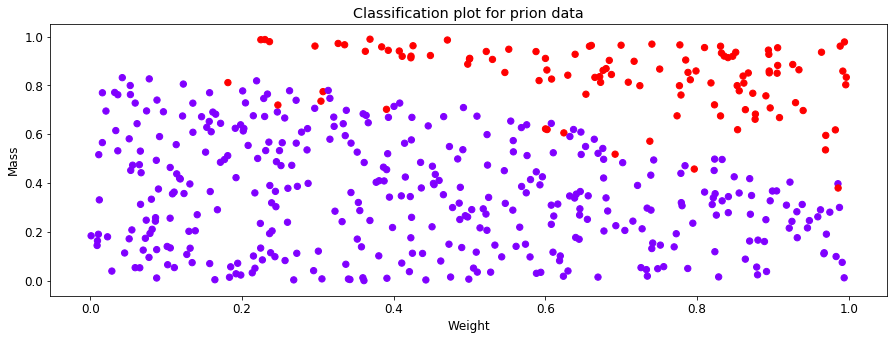

In [13]:
#Graph the dataset
X = dataset['mass']
Y = dataset['weight']

target = dataset['prion_status'] == 'prion'

#This makes a list that says which items are prions and which are not 
graph.scatter(X,Y, c = target, zorder = 10, s = 40)

graph.title("Classification plot for prion data")
graph.ylabel("Mass")
graph.xlabel("Weight")

graph.show()

#split up the data into test and training sets. Checking the total number of instances in the dataset by using the dataframe attribute shape. The first number is the one we want.


In [14]:
dataset.shape

(485, 3)

#use 400 examples for our training set, and the remainder for the test set.

In [15]:
train_X = dataset.drop(['prion_status'], 1).truncate(after = 399)
train_Y = dataset['prion_status'].truncate(after = 399)

test_X = dataset.drop(['prion_status'], 1).truncate(before = 400).reset_index(drop = True)
test_Y = dataset['prion_status'].truncate(before = 400).reset_index(drop = True)


In [16]:
#Summary of the data
print(train_X.describe())
print(train_Y.describe())

             mass      weight
count  400.000000  400.000000
mean     0.489133    0.455074
std      0.287709    0.284250
min      0.001031    0.002814
25%      0.236633    0.214480
50%      0.487189    0.434874
75%      0.734339    0.678262
max      0.996911    0.989369
count           400
unique            2
top       non-prion
freq            314
Name: prion_status, dtype: object


In [20]:
#Making a SVM (support vector machine)
from sklearn import svm

SVM_Model = svm.SVC(gamma = 'auto').fit(train_X, train_Y)
print("Done!")

Done!


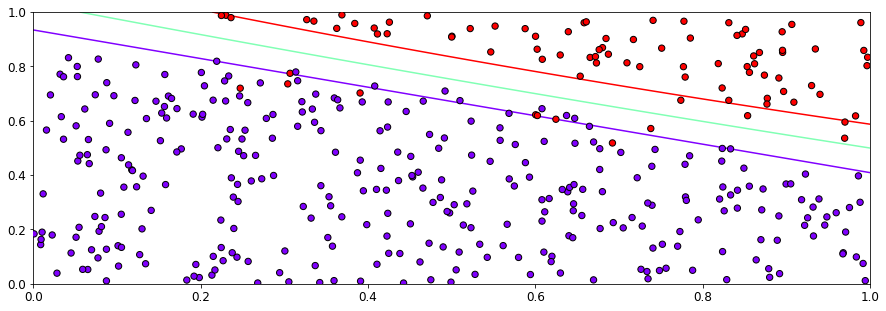

In [25]:
#Now the SVM is made. So plot the SVM 
def plot_SVM(clf, data, target):
    is_prion = target == 'prion' #make a list of which are prions
    
    graph.scatter(data['mass'], data['weight'], c = is_prion, zorder = 10, edgecolor = 'k', s = 40)
    
    #put the result into a color plot
    XX, YY  = np.mgrid[0:1:255j, 0:1:255j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    graph.contour(XX, YY, Z, color = ['k','k', 'k'], linestyle = ['--','--', '--'], levels = [-.5, 0, .5])
    graph.ylim(0,1)
    graph.xlim(0,1)
    
    graph.show()
    
#call te code to plot the SVM
plot_SVM(SVM_Model, train_X, train_Y)
    

#The SVM has done a reasonable job of separating our test dataset into two.
#Now take a look at the test set

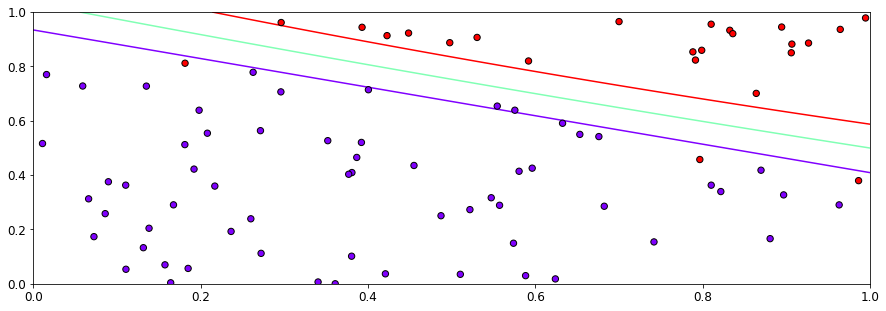

In [26]:
plot_SVM(SVM_Model, test_X, test_Y)

In [28]:
#Now calculate the accuracy of our SVM in each dataset.
train_P = SVM_Model.predict(train_X.values)
test_P = SVM_Model.predict(test_X.values)

#This function evaluates the SVM's accuracy
def evaluate_SVM(pred, real, name):
    matches = pred == real #see where predicted and real are the same
    accuracy = sum(matches)/len(matches)*100 #convert to percent
    print(name, "Set Accuracy: ", accuracy,"%")
    
evaluate_SVM(train_P, train_Y, "Train")
evaluate_SVM(test_P, test_Y, "Test")

Train Set Accuracy:  97.75 %
Test Set Accuracy:  96.47058823529412 %


Conclusion: We've taken a data set, cleaned and prepared it, made a SVM, and then evaluated it.

Play Time !!! 
play around with different kernels for your SVM models

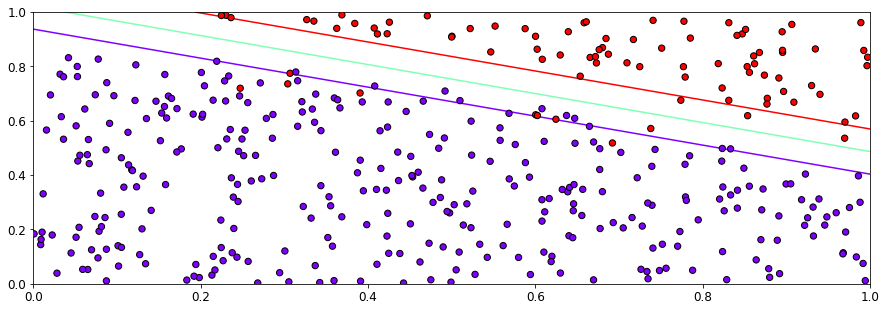

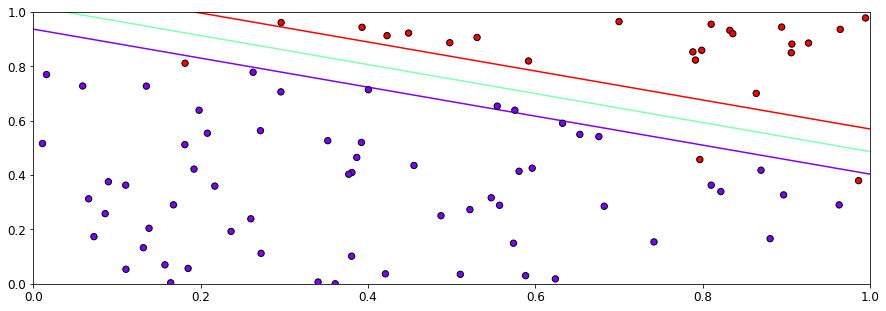

Train Set Accuracy:  97.75 %
Test Set Accuracy:  96.47058823529412 %


In [30]:
def assess_SVM(SVM_Model):
    # Plot the new linear SVM model
    plot_SVM(SVM_Model, train_X, train_Y)
    plot_SVM(SVM_Model, test_X, test_Y)

    # Use the model to predict the training and test sets.
    train_P = SVM_Model.predict(train_X.values)
    test_P = SVM_Model.predict(test_X.values)

    # Evaluate the model using the training and test sets
    evaluate_SVM(train_P, train_Y, 'Train')
    evaluate_SVM(test_P, test_Y, 'Test')

# Make a new linear SVM model
SVM_Model = svm.SVC(kernel = 'linear').fit(train_X, train_Y)

assess_SVM(SVM_Model)

In [31]:
#You can see the hyperplane is a linear line!
#Now lets try a sigmoid kernel.

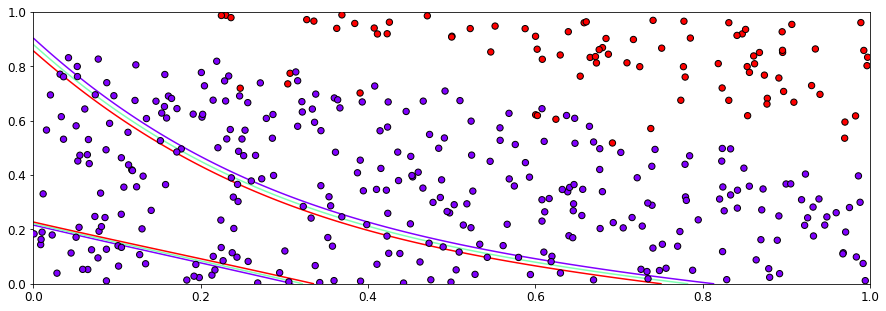

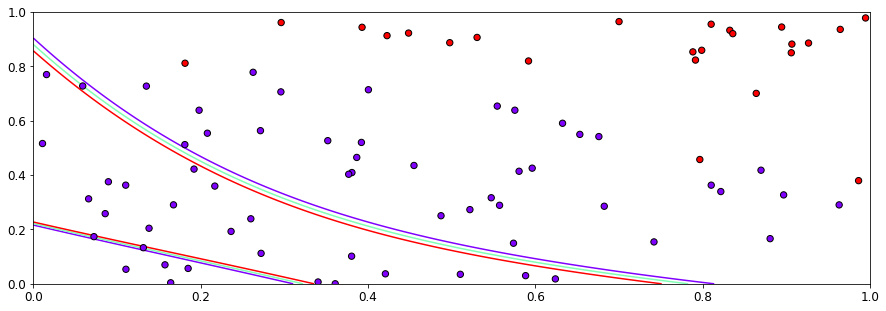

Train Set Accuracy:  59.5 %
Test Set Accuracy:  44.70588235294118 %


In [35]:
#Make a new sigmoid SVM model
SVM_Model= svm.SVC(kernel = 'sigmoid', gamma = 4, coef0 = 0).fit(train_X, train_Y)
assess_SVM(SVM_Model)

Perhaps a sigmoid kernel isn't a good idea for this data set....

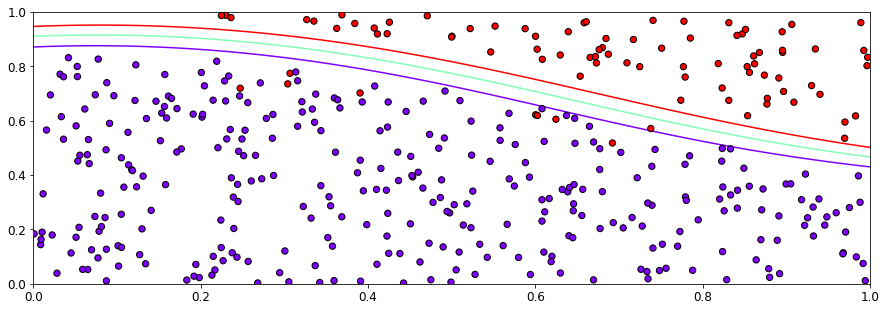

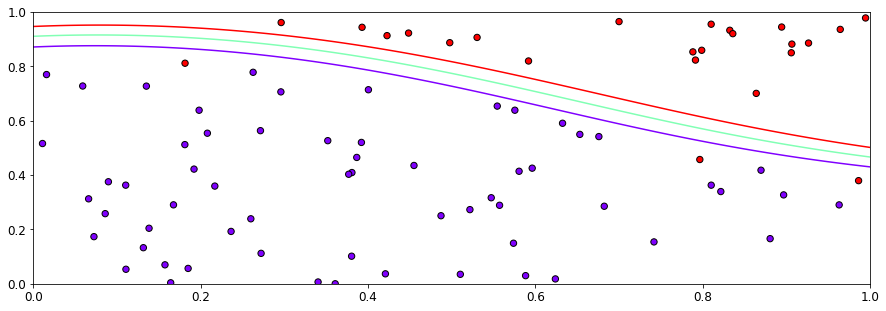

Train Set Accuracy:  97.75 %
Test Set Accuracy:  96.47058823529412 %


In [43]:
#Lets try a polynomial kernel
#Making a new polynomial SVM model 

SVM_Model = svm.SVC(kernel = 'poly', gamma = 10, degree = 3, coef0 = 0).fit(train_X, train_Y)

assess_SVM(SVM_Model)

If we were to carry on analyzing prions like this, polynomial looks like a good choice. If the data set was more complicated we could try different degrees for the polynomial to see which one was the most accurate. This is part of tuning a model.